Import potrzebnych bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Wczytujemy pliki danych do odpowiednich zmiennych train oraz test

In [2]:
data_train = np.loadtxt('train_set.csv', delimiter=';')
data_test = np.loadtxt('test_set.csv', delimiter=';')

Rozdzielamy dane na argument i wartość funkcji i zmieniamy ich kształt, aby pasował on do funkcji sklearn

In [3]:
X_train = np.reshape(data_train[:, 0],(-1,1))
y_train = np.reshape(data_train[:, 1],(-1,1))

X_test = np.reshape(data_test[:, 0],(-1,1))
y_test = np.reshape(data_test[:, 1],(-1,1))



Wyświetlamy wykres punktowy dla danych treningowych

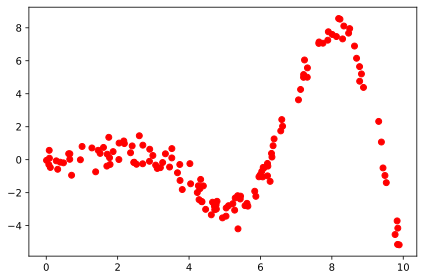

In [4]:
%config InlineBackend.figure_format = 'svg'
plt.scatter(X_train, y_train, color='red')
plt.tight_layout()
plt.show()
plt.close()

Tworzymy pomocniczą funkcję która utworzy nam obiekt PolymonialFeatures, przygotuje odpowiedni stopień danych i wytrenuje regresję LinearRegression (gotowa funkcja zapożyczona z labolatorium)


In [5]:
def polynomial_regression(attributes,
                          degree,
                          values):
    '''
    Argumenty:
    ----------
    attributes - wektor cech do treningu (X)
    degree - stopień wielomianu, którym chcemy dokonywać regresji
    values - wartości odpowiadające cechom z 'attributes', których model ma się nauczyć (Y)
    '''
    regression = PolynomialFeatures(degree=degree)
    # Stwórzmy teraz kolejne potęgi cech. Jeśli potrzebujemy wielomianu stopnia
    # N, to musimy dla wszystkich danych wygenerować potęgi (2, ..., N-1).
    polynomial = regression.fit_transform(attributes)
    # Gdy mamy tak przygotowane dane, możemy wyuczyć model regresji.
    pol_regression = LinearRegression()
    pol_regression.fit(polynomial, values)
    return regression, pol_regression

Pomocnicza funkcja sortująca (zapożyczona z labolatorium)

In [6]:
def sort_two_lists(list1, list2):
    # Łączymy dane kolumnowo.
    merged = np.concatenate((list1, list2), axis=1)
    # Sortujemy według argumentów, które są w 0-wej kolumnie.
    sorted_list = merged[merged[:, 0].argsort()]
    return(sorted_list)

Teraz tworzymy główną funkcję, która będzie trenować nasze regresje (zmodyfikowana funkcja z labolatorium - argumenty do funkcji są już rozdzielone na zbiory testowe jak i treningowe,wykres zmieniony został na histogram, a posortowane predykcje uwzględniają też predykcje na zbiorze treningowym)

In [7]:
def prepare_regression( X_train, X_test, y_train, y_test, max_degree):
    '''
    Argumenty:
    ----------
    X_train - wektor cech, zbiór treningowy
    y_train - wektor wartości, zbiór treningowy
    X_test - wektor cech, zbiór testowy
    y_test - wektor wartości, zbiór testowy
    max_degree - maksymalny stopień wielomianu, przy pomocy którego chcemy wykonać regresję
    '''
  
    # Przygotujmy puste listy, gdzie będziemy umieszczać kolejno:
    # modele regresji, współczynniki wielomianów oraz wartości błędów na zbiorach 
    # treningowym i testowym.
    models, parameters, train_errors, test_errors,sorted_predictions = [], [], [], [],[]
    
    plt.figure(figsize=(12, 7))
    # Wykonajmy regresje wielomianami stopnia (1, 2, ..., max_degree)
    for i in range(1, max_degree + 1):
        poly_model, linear_model = polynomial_regression(X_train,
                                                         i,
                                                         y_train)
        models.append(linear_model)
        parameters.append(linear_model.coef_)
        # Dokonajmy predykcji na zbiorach treningowym i testowym i zmierzmy
        # wartość błędu średniokwadratowego. Najpierw musimy utworzyć wartości
        # kolejnych potęg dla argumentów.
        y_train_prediction = linear_model.predict(poly_model.fit_transform(X_train))
        y_test_prediction = linear_model.predict(poly_model.fit_transform(X_test))
        
        # Sortujemy predykcje uwzględniając zbiór treningowy
        sorted_predictions = sort_two_lists(np.concatenate([X_test, X_train]), np.concatenate([y_test_prediction, y_train_prediction]))
        # Obliczamy róznice między wartościami przewidywanymi a rzeczywistymi
        differences = np.subtract(y_test_prediction,y_test)
        # Obliczamy błędy średniokwadratowe
        train_errors.append(mean_squared_error(y_train_prediction, y_train))
        test_errors.append(mean_squared_error(y_test_prediction, y_test))
        # Przygotujmy wykres histogramów.
        plt.subplot(4,5,i)
        plt.hist(differences,density=True)
        plt.title(f"Histogram of errors for {i} degree",fontsize=9)
        plt.xlabel("Error value",fontsize=9)
        plt.ylabel("Density",fontsize=9)
       
    plt.tight_layout()
    plt.show()
    return models, parameters, train_errors, test_errors,sorted_predictions

Trenujemy modele

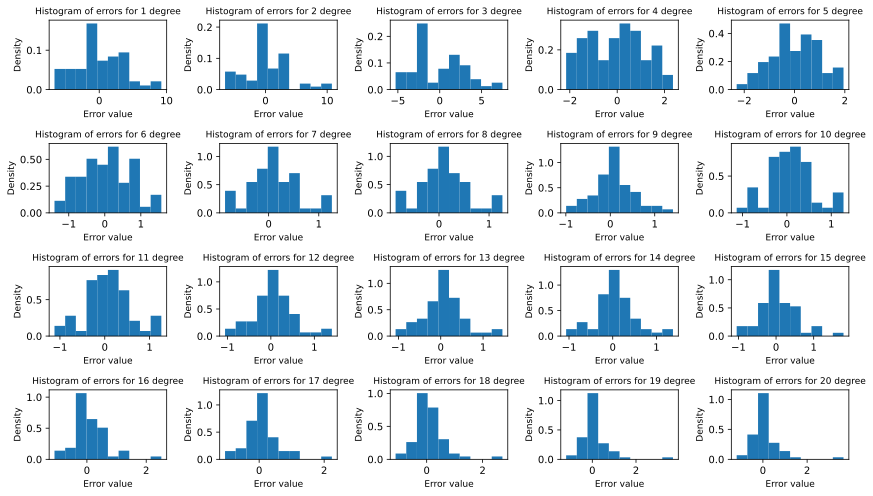

In [8]:
max_degree=20
models, parameters, train_errors, test_errors,sorted_predictions = prepare_regression(X_train,X_test,y_train,y_test,max_degree)
                                                                               

In [9]:
print('Wartości błędów na zbiorze treningowym: \n')

for i in range(1, max_degree+1):
    print(f'''Stopień wielomianu: {i},
              błąd na zb. treningowym: {train_errors[i - 1]},
              błąd na zb. testowym: {test_errors[i - 1]} \n ''')

Wartości błędów na zbiorze treningowym: 

Stopień wielomianu: 1,
              błąd na zb. treningowym: 9.501978251882907,
              błąd na zb. testowym: 12.090251656588855 
 
Stopień wielomianu: 2,
              błąd na zb. treningowym: 9.083038548683803,
              błąd na zb. testowym: 12.906194303792088 
 
Stopień wielomianu: 3,
              błąd na zb. treningowym: 7.535688145442554,
              błąd na zb. testowym: 8.905226447640224 
 
Stopień wielomianu: 4,
              błąd na zb. treningowym: 1.6081643425529553,
              błąd na zb. testowym: 1.397501008382009 
 
Stopień wielomianu: 5,
              błąd na zb. treningowym: 0.7219234766262722,
              błąd na zb. testowym: 0.8861616147612305 
 
Stopień wielomianu: 6,
              błąd na zb. treningowym: 0.4752874064741509,
              błąd na zb. testowym: 0.4708356965838751 
 
Stopień wielomianu: 7,
              błąd na zb. treningowym: 0.2775087814998815,
              błąd na zb. testowym: 0.240

Jak widać błąd na zbiorze testowym był najmniejszy dla wielomianiu o stopniu 9

Wylistujemy teraz współczyniki tego wielomianiu z zaokrągleniem do dwóch miejsc po przecinku:

In [10]:
print("Wspołczyniki wielomianiu o stopniu 9: \n")
parameterArray=[f"Współczynnik B{i}: {round(parameters[8][0][i],2)}" for i in range(10)]
for parameter in parameterArray:
    print(parameter)

Wspołczyniki wielomianiu o stopniu 9: 

Współczynnik B0: 0.0
Współczynnik B1: -1.01
Współczynnik B2: 2.84
Współczynnik B3: -3.03
Współczynnik B4: 1.85
Współczynnik B5: -0.66
Współczynnik B6: 0.13
Współczynnik B7: -0.01
Współczynnik B8: 0.0
Współczynnik B9: -0.0


Rysujemy wykres, gdzie umieszczamy zbiór testowy, treningowy oraz wykres wielomianu wraz z legendą

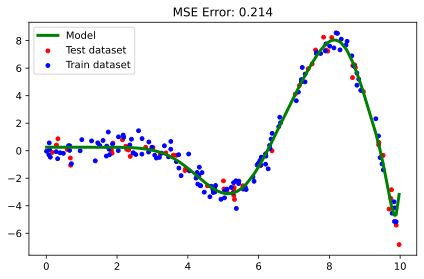

In [11]:
plt.scatter(X_test, y_test, color='red',s=15,label="Test dataset")
plt.scatter(X_train, y_train, color='blue',s=15,label="Train dataset")
plt.plot(sorted_predictions[:, 0], sorted_predictions[:, 1],
                 linewidth=3, color='green',label="Model")
plt.title(f"MSE Error: {round(test_errors[8],3)}")
plt.legend()
plt.tight_layout()
plt.show()